In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
%matplotlib inline
# pip install graphviz
# conda install python-graphviz
from sklearn.tree import export_graphviz

In [3]:
crm = pd.read_csv('crm1.csv')
#crm dataset column and rows
shape = crm.shape[0], crm.shape[1]

rev = pd.read_csv('rev1.csv')
#rev (revneue) dataset column and rows
shape = rev.shape[0], rev.shape[1]

device = pd.read_csv('device1.csv')
#device dataset column and rows
shape = device.shape[0], device.shape[1]

In [4]:
merged = pd.merge(pd.merge(crm, device, on='msisdn'),rev,on='msisdn')

In [5]:
merged = merged.dropna()
merged

#Checking if there are null values
merged.isnull().sum()

msisdn           0
gender           0
year_of_birth    0
system_status    0
mobile_type      0
value_segment    0
imei_tac         0
brand_name       0
model_name       0
os_name          0
os_vendor        0
week_number      0
revenue_usd      0
dtype: int64

In [6]:
merged.get('gender').unique()

array(['Male', 'Female', 'MALE', 'FEMALE', 'M'], dtype=object)

In [7]:
def new_gender_status(gender):
    if gender == 'Male':
        return 0
    elif gender == 'MALE': 
        return 0
    elif gender ==  'M':
        return 0
    elif gender == 'Female': 
        return 1
    elif gender == 'FEMALE':
        return 1

merged= merged.assign(genders= merged.get('gender').apply(new_gender_status))#assigning new column to name genders
merged= merged.drop(columns= ['gender']) #drop old gender category
merged.get('genders').unique()
merged

,msisdn,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders
0,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0
1,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0
2,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0
3,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0
4,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0


In [8]:
# assigning a new column: birth_year- rather than year_of_birth
merged= merged.assign(birth_year= merged.get('year_of_birth').astype(int))
merged = merged.drop(columns= ['year_of_birth'])
merged 

,msisdn,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952


In [9]:
merged.get('mobile_type').unique()

array(['Prepaid', 'Postpaid'], dtype=object)

In [10]:
#Function that assigns 0 to mobile_type value is 'Postpaid' and 1 to 'Prepaid'
def mobile_type(type):
    if type == 'Postpaid':
        return 0
    elif type == 'Prepaid':
        return 1
    
merged = merged.assign(paid_status= merged.get('mobile_type').apply(mobile_type))
merged = merged.drop(columns= ['mobile_type'])
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year,paid_status
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988,1
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988,1
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988,1
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988,1
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952,1
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952,1
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952,1
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952,1


In [11]:
def system_status(status):
    if status == 'ACTIVE':
        return 1
    else:
        return 0 

merged = merged.assign(active_status= merged.get('system_status').apply(system_status))
merged = merged.drop(columns = ['system_status'])
merged

,msisdn,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year,paid_status,active_status
0,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988,1,1
1,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988,1,1
2,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988,1,1
3,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988,1,1
4,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952,1,1
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952,1,1
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952,1,1
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952,1,1


In [12]:
merged = merged.assign(revenue= merged.get('revenue_usd').astype(int))
merged = merged.drop(columns= ['revenue_usd'])
merged

,msisdn,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,active_status,revenue
0,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,1,8
1,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,1,4
2,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,1,19
3,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,1,9
4,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,1,20
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,1,11
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,1,10
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,1,10


In [13]:
def decade_to_year(year):
    divide_year = year/10
    int_year = int(divide_year)
    multiply = int_year*10
    return multiply

merged= merged.assign(decade= merged.get('birth_year').apply(decade_to_year))
merged

,msisdn,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,active_status,revenue,decade
0,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,1,8,1980
1,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,1,4,1980
2,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,1,19,1980
3,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,1,9,1980
4,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,1,13,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,1,20,1950
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,1,11,1950
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,1,10,1950
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,1,10,1950


In [14]:
merged = merged.assign(age= 2022-merged.get('birth_year').astype(int))
merged

,msisdn,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,active_status,revenue,decade,age
0,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,1,8,1980,34
1,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,1,4,1980,34
2,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,1,19,1980,34
3,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,1,9,1980,34
4,4f5216988c44ec0a96a82a04f28b49fa,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,1,13,1980,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,1,20,1950,70
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,1,11,1950,70
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,1,10,1950,70
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,1,10,1950,70


In [15]:
merged['os_vendor'].value_counts()

Google             73513
Symbian            23707
Proprietary OS     17234
Samsung             6588
Apple               1517
Microsoft            397
Motorola             346
LG                   210
NOKIA                173
SPREADTRUM           162
Siemens              148
Mentor Graphics       80
RIM                   39
MOCOR                 25
ALIBABA               11
Name: os_vendor, dtype: int64

In [16]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
merged['os_name']= label_encoder.fit_transform(merged['os_name'])
merged['os_vendor']= label_encoder.fit_transform(merged['os_vendor'])
merged['brand_name']= label_encoder.fit_transform(merged['brand_name'])

In [26]:
merged_cleaned= merged.drop(columns= ['msisdn','value_segment', 'imei_tac', 'model_name'])
merged=merged_cleaned
merged

,brand_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,active_status,revenue,decade,age
0,127,0,2,34,0,1988,1,1,8,1980,34
1,127,0,2,24,0,1988,1,1,4,1980,34
2,127,0,2,30,0,1988,1,1,19,1980,34
3,127,0,2,31,0,1988,1,1,9,1980,34
4,127,0,2,33,0,1988,1,1,13,1980,34
...,...,...,...,...,...,...,...,...,...,...,...
213228,127,0,2,23,0,1952,1,1,20,1950,70
213229,127,0,2,25,0,1952,1,1,11,1950,70
213230,127,0,2,29,0,1952,1,1,10,1950,70
213231,127,0,2,28,0,1952,1,1,10,1950,70


Text(0, 0.5, 'Distribution')

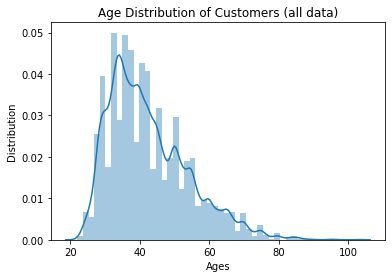

In [27]:
all_age= sns.distplot(merged_cleaned['age'])

plt.title('Age Distribution of Customers (all data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

In [28]:
for column in merged_cleaned:
    unique_vals = np.unique(merged_cleaned[column])
    nr_values = len(unique_vals)
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))

The number of values for feature brand_name :154 -- [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153]
The number of values for feature os_name :24 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature os_vendor :15 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
The number of values for feature week_number :14 -- [22 23 24 25 26 27 28 29 30 31 32 33 34 35]
The num

In [29]:
l=merged['active_status'].value_counts()
l[0]/l[1]*100

2.1003980394091912

In [30]:
X = merged.drop('active_status', axis=1).values# Input features (attributes)
y = merged['active_status'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# using a 80-train/20-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (124150, 10)
y shape: (124150,)


In [31]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)

In [32]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  0.9606840351982475
Testing Accuracy is:  0.9257349979863069


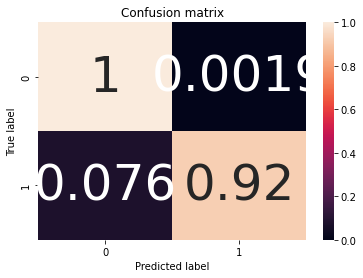

In [34]:
w=100
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',class_weight={0: w, 1: 1})
rf.fit(X_resampled, y_resampled)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  0.9822392267418445
Testing Accuracy is:  0.966733789770439


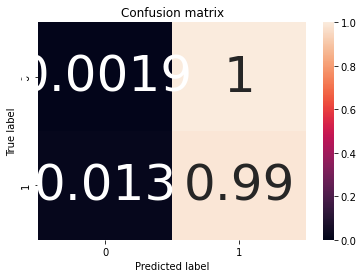

In [35]:
#FOR D3 Plain Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  0.5243954161570992
Testing Accuracy is:  0.966733789770439


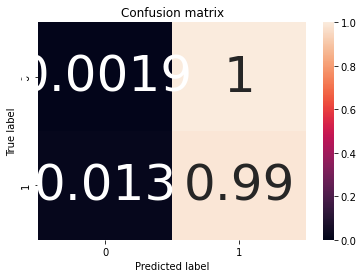

In [36]:
#FOR D3 Plain Random Forest with ADASYN OP
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [37]:
df=pd.read_csv('d2.csv')

In [38]:
df=df.dropna()

In [39]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [40]:
merged = df.drop(columns= ['State','Area Code','Phone'])


In [42]:
l=merged['Churn?'].value_counts()
l[1]/l[0]*100

16.94736842105263

In [47]:
merged.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [48]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
merged['Int\'l Plan']= label_encoder.fit_transform(merged['Int\'l Plan'])

In [49]:
merged['VMail Plan']= label_encoder.fit_transform(merged['VMail Plan'])

In [50]:
merged['Churn?']= label_encoder.fit_transform(merged['Churn?'])

In [51]:
merged.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [52]:
X = merged.drop('Churn?', axis=1).values# Input features (attributes)
y = merged['Churn?'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# using a 80-train/20-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (3333, 17)
y shape: (3333,)


In [53]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


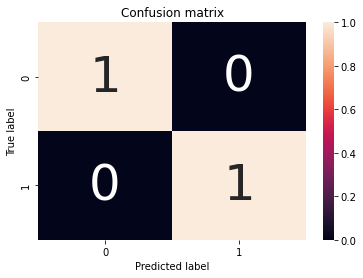

In [55]:
w=100
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',class_weight={0: w, 1: 1})
rf.fit(X_resampled, y_resampled)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  1.0
Testing Accuracy is:  0.95952023988006


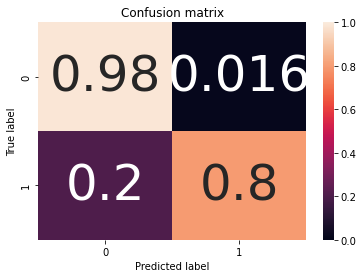

In [56]:
#FOR D3 Plain Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


Training Accuracy is:  0.8612237700581908
Testing Accuracy is:  0.9685157421289355


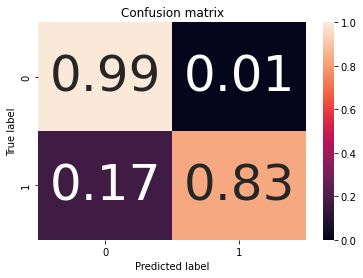

In [57]:
#FOR D3 Plain Random Forest with ADASYN OP
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


In [43]:
df=pd.read_csv('d3.csv')

In [20]:
df=df.dropna()

In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
merged = df.drop(columns= ['customerID'])


In [48]:
l=merged['Churn'].value_counts()
l[1]/l[0]*100

36.122922303826826

In [27]:
print(merged)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [28]:
merged['Churn']= label_encoder.fit_transform(merged['Churn'])
merged['PaymentMethod']= label_encoder.fit_transform(merged['PaymentMethod'])
merged['PaperlessBilling']= label_encoder.fit_transform(merged['PaperlessBilling'])
merged['Contract']= label_encoder.fit_transform(merged['Contract'])
merged['StreamingMovies']= label_encoder.fit_transform(merged['StreamingMovies'])
merged['StreamingTV']= label_encoder.fit_transform(merged['StreamingTV'])
merged['TechSupport']= label_encoder.fit_transform(merged['TechSupport'])
merged['DeviceProtection']= label_encoder.fit_transform(merged['DeviceProtection'])
merged['OnlineSecurity']= label_encoder.fit_transform(merged['OnlineSecurity'])
merged['InternetService']= label_encoder.fit_transform(merged['InternetService'])
merged['MultipleLines']= label_encoder.fit_transform(merged['MultipleLines'])
merged['PhoneService']= label_encoder.fit_transform(merged['PhoneService'])
merged['Dependents']= label_encoder.fit_transform(merged['Dependents'])
merged['Partner']= label_encoder.fit_transform(merged['Partner'])
merged['gender']= label_encoder.fit_transform(merged['gender'])
merged['OnlineBackup']= label_encoder.fit_transform(merged['OnlineBackup'])
merged['TotalCharges']= label_encoder.fit_transform(merged['TotalCharges'])


In [29]:
print(merged)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity OnlineBackup  \
0                 1                0      

In [38]:
X = merged.drop('Churn', axis=1).values# Input features (attributes)
y = merged['Churn'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# using a 80-train/20-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (7043, 19)
y shape: (7043,)


In [39]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)

Training Accuracy is:  0.9980077791480885
Testing Accuracy is:  0.9985805535841022


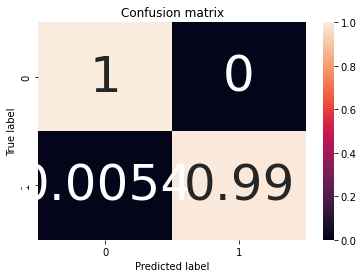

In [40]:
#ADASYN OP WITH WEIGHTED RANDOM FOREST
w=100
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',class_weight={0: w, 1: 1})
rf.fit(X_resampled, y_resampled)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  0.997515086971956
Testing Accuracy is:  0.7771469127040455


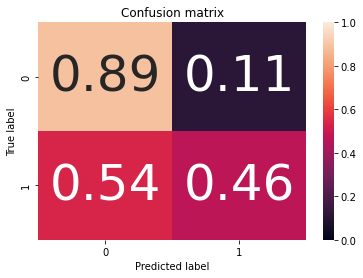

In [41]:
#FOR D3 Plain Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


Training Accuracy is:  0.863580305473864
Testing Accuracy is:  0.7828246983676366


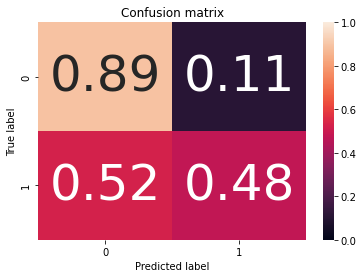

In [42]:
#FOR D3 Plain Random Forest with ADASYN OP
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


In [49]:
df=pd.read_csv('d4.csv')

In [50]:
df=df.dropna()

In [51]:
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [52]:
merged = df.drop(columns= ['Unnamed: 0','ID'])


In [55]:
l=merged['TARGET'].value_counts()
l[1]/l[0]*100

1.7076723858853997

In [63]:
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [64]:
merged['GENDER']= label_encoder.fit_transform(merged['GENDER'])
merged['CAR']= label_encoder.fit_transform(merged['CAR'])
merged['REALITY']= label_encoder.fit_transform(merged['REALITY'])
merged['INCOME_TYPE']= label_encoder.fit_transform(merged['INCOME_TYPE'])
merged['EDUCATION_TYPE']= label_encoder.fit_transform(merged['EDUCATION_TYPE'])
merged['FAMILY_TYPE']= label_encoder.fit_transform(merged['FAMILY_TYPE'])
merged['HOUSE_TYPE']= label_encoder.fit_transform(merged['HOUSE_TYPE'])


In [65]:
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,2.0,29,59,3,0
1,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,4,52,8,0
2,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,26,52,8,0
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,26,52,8,0
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,38,52,8,0


In [66]:
X = merged.drop('TARGET', axis=1).values# Input features (attributes)
y = merged['TARGET'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# using a 80-train/20-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (25134, 17)
y shape: (25134,)


In [67]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)

Training Accuracy is:  0.9979764458294549
Testing Accuracy is:  0.9992042967972946


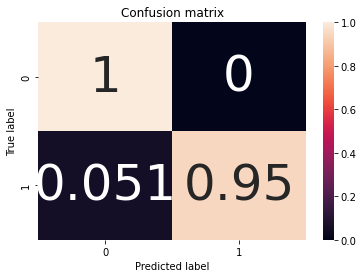

In [71]:
#ADASYN OP WITH WEIGHTED RANDOM FOREST
w=200
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',class_weight={0: w, 1: 1})
rf.fit(X_resampled, y_resampled)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  0.9985079822947233
Testing Accuracy is:  0.9822956037398051


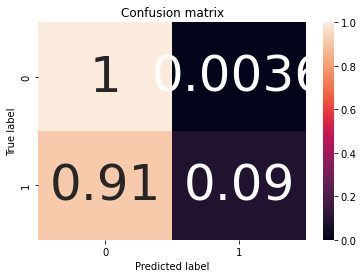

In [69]:
#FOR D3 Plain Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  0.6256424784491481
Testing Accuracy is:  0.9828923811418341


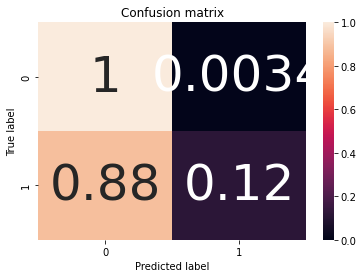

In [70]:
#FOR D3 Plain Random Forest with ADASYN OP
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_resampled, y_resampled))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)
